# Code

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image

def plot_in_range(image, scale=False):
    if scale:
        minValue = np.amin(image)
        maxValue = np.amax(image)
        plt.imshow((image-minValue)/(maxValue-minValue))
    else:
        plt.imshow(image)
    plt.show()

### Here are two images to test the image processing algorithm

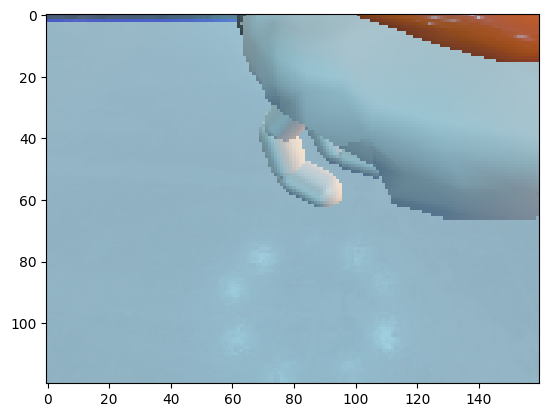

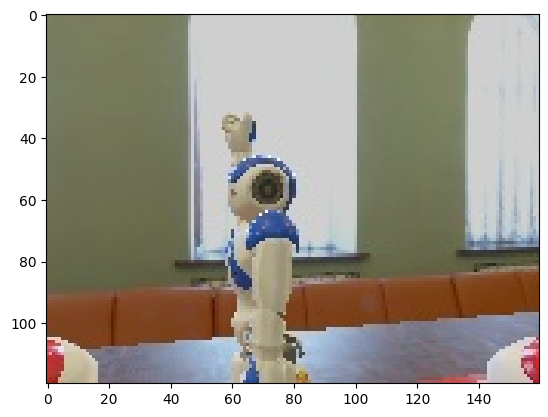

In [2]:
im1 = np.asarray(PIL.Image.open("4.0.png"))
im2 = np.asarray(PIL.Image.open("window_back.jpg"))
plot_in_range(im1)
plot_in_range(im2)

#### First, we use the Laplacian operator to detect sharp color changes

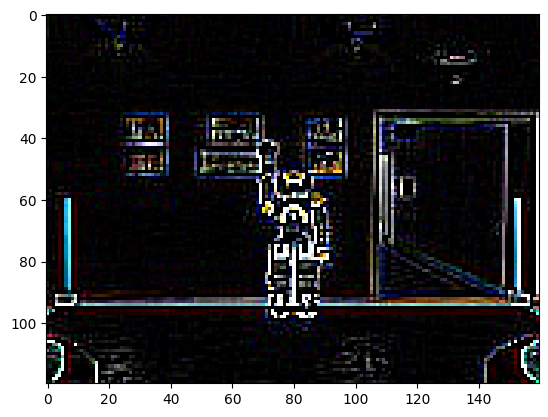

[[[  0   8   0]
  [  0   0   0]
  [  0  12   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 16  24   0]
  [ 12   0  12]
  [  2  18   0]
  ...
  [  0   0   0]
  [  2   2   2]
  [  8   8   8]]

 [[ 16  24   0]
  [  6   0   6]
  [  0   8   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  8   8   8]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [120 214 186]
  [  0   0   0]
  [ 76 100 108]]

 [[  0   0   0]
  [  0   0   0]
  [255 255 255]
  ...
  [255 255 255]
  [184 255 240]
  [  0  60  32]]

 [[  0  40  16]
  [  4  12  20]
  [ 92 104  92]
  ...
  [  0   0   0]
  [  0  48   8]
  [ 48 255 208]]]


In [39]:
img = im1.copy()
laplacian = cv2.Laplacian(img, cv2.CV_8U, ksize=3)
plot_in_range(laplacian)
print(laplacian)

#### The high values are then smoothed out using a Gaussian blur to get blurry blobs

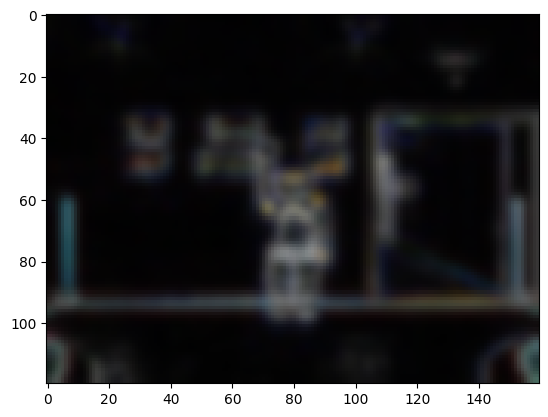

In [28]:
blur = cv2.GaussianBlur(laplacian, (0, 0), 2)
plot_in_range(blur)

#### We then convert the image to grayscale and threshold it to get a binary image

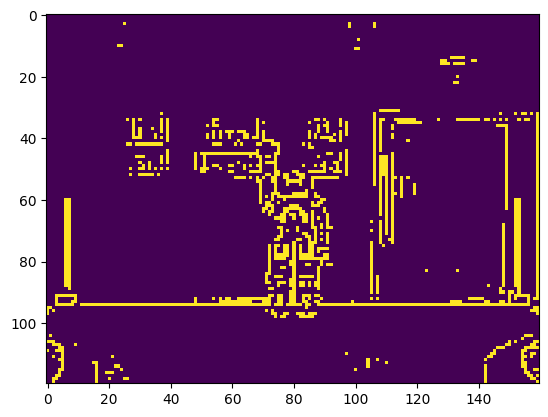

In [5]:
gray = cv2.cvtColor(laplacian, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)
plot_in_range(thresh)

#### We then use the closing operator to clump together small groups of blobs

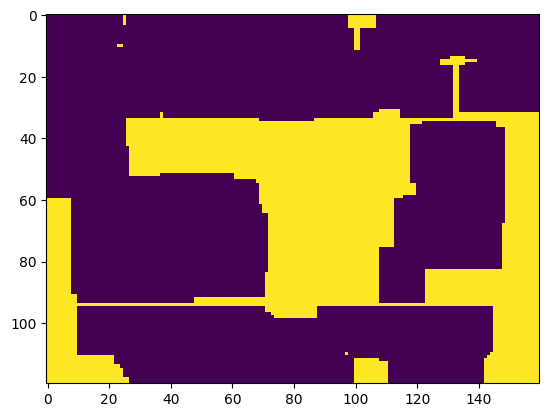

In [6]:
closing = cv2.morphologyEx(
            thresh, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15)))
plot_in_range(closing)


#### We finally find the largest contour in the image, which should be the opponent

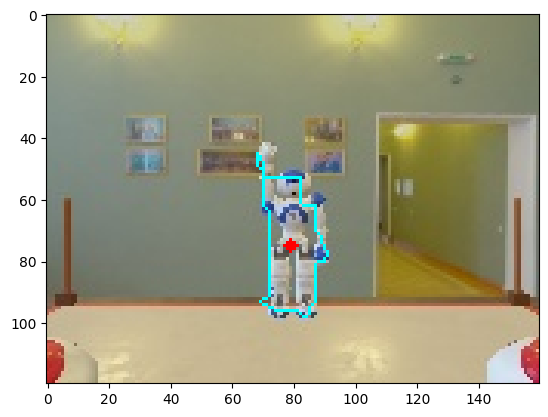

In [28]:
contours, hierarchy = cv2.findContours(
    closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
largest_contour = contours[0]
M = cv2.moments(largest_contour)
horizontal_center = int(M['m10']/M['m00'])
vertical_center = int(M['m01']/M['m00'])

# draw largest contour on original image
mask = img.copy()
cv2.drawContours(mask, [largest_contour], 0, (0, 255, 255), 1)
mask = cv2.circle(mask, (horizontal_center, vertical_center), radius=2, color=(255, 0, 0), thickness=-1)
plot_in_range(mask)


In [44]:
import cv2
import numpy as np

# read image as grayscale
img = cv2.imread('red_line.png')

# threshold on red color
lowcolor = (0,0,75)
highcolor = (50,50,135)
thresh = cv2.inRange(im1, lowcolor, highcolor)


# apply morphology close
kernel = np.ones((5,5), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# get contours and filter on area
result = img.copy()
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
result = img.copy()
for c in contours:
    area = cv2.contourArea(c)
    if area > 5000:
        cv2.drawContours(result, [c], -1, (0, 255, 0), 2)


# show thresh and result    
cv2.imshow("thresh", thresh)
cv2.imshow("result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# save resulting images
cv2.imwrite('red_line_thresh.png',thresh)
cv2.imwrite('red_line_extracted.png',result)

AttributeError: 'NoneType' object has no attribute 'copy'

In [43]:
import cv2
import numpy as np



# threshold on red color
lowcolor = (0, 50, 80)
highcolor = (16, 255, 255)
thresh = cv2.inRange(img1, lowcolor, highcolor)


# apply morphology close
kernel = np.ones((5,5), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# get contours and filter on area
result = img.copy()
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
result = img.copy()
for c in contours:
    area = cv2.contourArea(c)
    if area > 5000:
        cv2.drawContours(result, [c], -1, (0, 255, 0), 2)


# show thresh and result    
cv2.imshow("thresh", thresh)
cv2.imshow("result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# save resulting images
cv2.imwrite('red_line_thresh.png',thresh)
cv2.imwrite('red_line_extracted.png',result)

NameError: name 'img1' is not defined

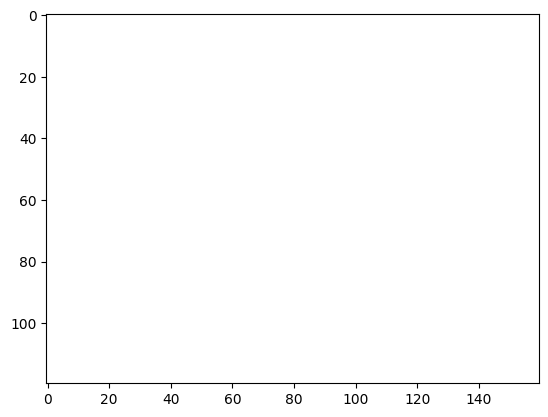

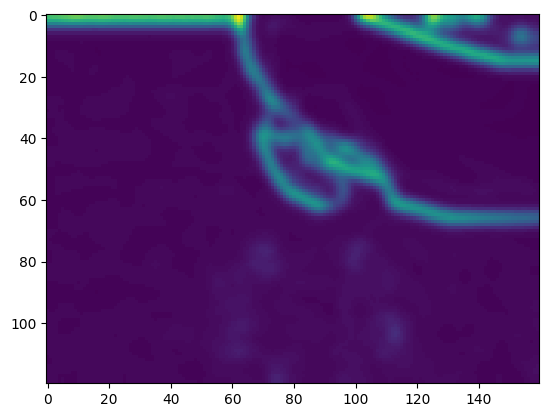

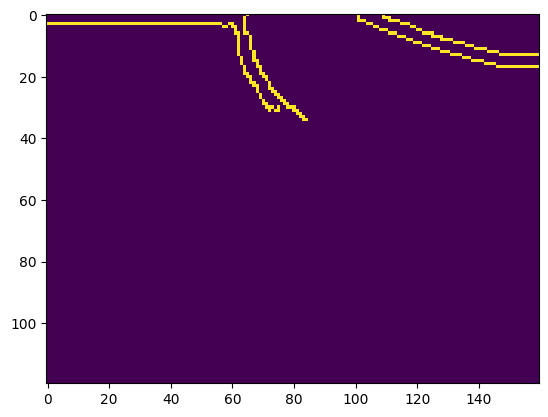

None


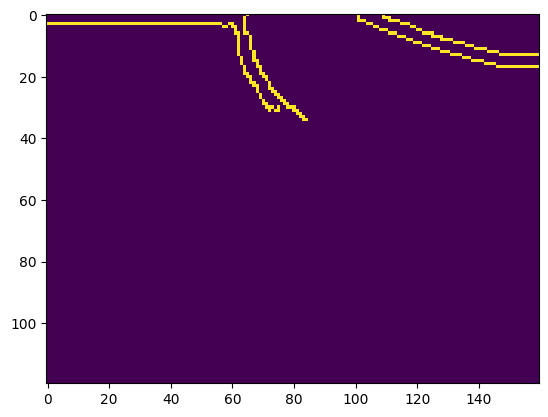

In [5]:
import math
img = im1.copy()
laplacian = cv2.Laplacian(img, cv2.CV_8U, ksize=3)
plot_in_range(laplacian)
blur = cv2.GaussianBlur(laplacian, (0, 0), 2)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
plot_in_range(gray)
# Convert the image to gray-scale
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
#cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
# Find the edges in the image using canny detector
edges = cv2.Canny(gray, 50, 150)
plot_in_range(edges)
# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=1, maxLineGap=2)
print(lines)
# Draw the lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(edges, pt1, pt2, (100,133,255), 3, cv2.LINE_AA)
        
plot_in_range(edges)




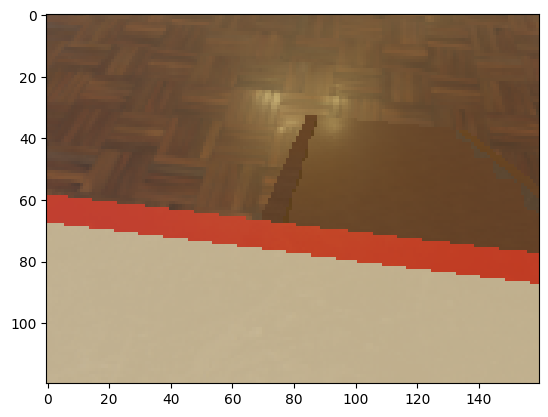

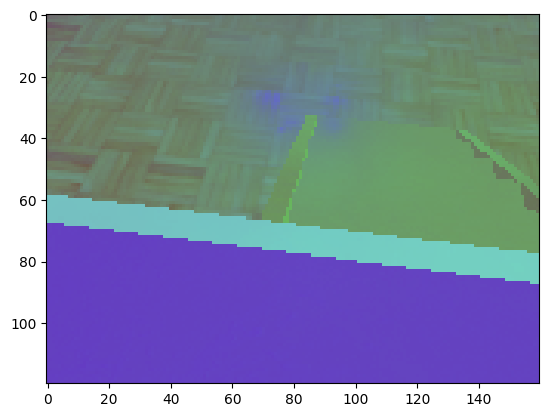

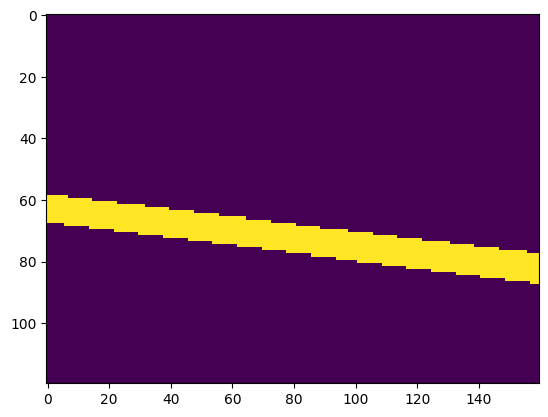

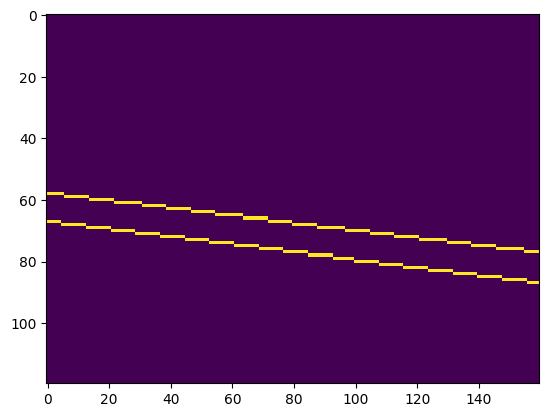

[[[ 93  69 159  77]]

 [[  0  67 159  87]]

 [[  0  58 100  70]]]
64.66666666666667 88.0
Trun around parameter 1


In [109]:
import cv2
import numpy as np
import math
import matplotlib. pyplot as plt
import PIL.Image

def plot_in_range(image, scale=False):
    if scale:
        minValue = np.amin(image)
        maxValue = np.amax(image)
        plt.imshow((image-minValue)/(maxValue-minValue))
    else:
        plt.imshow(image)
    plt.show()

# reading image
#img5 = cv2.imread("camera.jpg")
img5 = cv2.imread("17.0.png")
plot_in_range(img5)
#plt.imshow(img5)

# changing to hsv for better processing for the colors
hsv = cv2.cvtColor(img5, cv2.COLOR_BGR2HSV)
plot_in_range(hsv)
#plt.imshow(hsv)

# masking lower and upper bounds BGR
# These are for RGB
lower = (103, 127, 157)
upper = (179, 234, 255)

# changing threshold to BGR
#lower = (80, 50, 0)
#upper = (255, 255, 16)

mask = cv2.inRange(hsv, lower, upper)
plot_in_range(mask)
#plt.imshow(mask)

# edge detection ( this is essential since the hough transform only able to identify gray scale image)
edge = cv2.Canny(mask, 50, 200, None, 3)
plot_in_range(edge)


#line = np.asarray(edge)

lines = cv2.HoughLinesP(edge, 1, np.pi/180, 50, minLineLength=10, maxLineGap=4)
print(lines)
#print(lines[0][0][1], len(lines)) 

number_of_lines = len(lines)

# Just y position indicator can show us the correct position
ya_pixel = 0
yb_pixel = 0 
ya_max = 80
yb_max = 80
turn_around = 0

if lines is not None:
    for i in range(0, len(lines)):
        for j in range(0, len(lines[i])):
            #print(lines[i][j][1])
            ya_pixel = ya_pixel + lines[i][j][1]
            yb_pixel = ya_pixel + lines[i][j][3]
    if ya_pixel/number_of_lines > ya_max or yb_pixel/number_of_lines > yb_max:
        turn_around = 1
        print(ya_pixel/number_of_lines,yb_pixel/number_of_lines)
        print('Trun around parameter', turn_around)
    
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(lines, pt1, pt2, (100,133,255), 3, cv2.LINE_AA)     
#plot_in_range(lines)


In [1]:
def line_detection(image):
    import cv2
    import numpy as np
    import math
    import matplotlib. pyplot as plt
    import PIL.Image

    def plot_in_range(image, scale=False):
        if scale:
            minValue = np.amin(image)
            maxValue = np.amax(image)
            plt.imshow((image-minValue)/(maxValue-minValue))
        else:
            plt.imshow(image)
        plt.show()
    
    plot_in_range(image)

    # changing to hsv for better processing for the colors
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    #plot_in_range(hsv)


    # masking lower and upper bounds BGR
    # These are for RGB
    lower = (103, 127, 157)
    upper = (179, 234, 255)

    # changing threshold to BGR
    #lower = (80, 50, 0)
    #upper = (255, 255, 16)

    mask = cv2.inRange(hsv, lower, upper)
    #plot_in_range(mask)
 

    # edge detection ( this is essential since the hough transform only able to identify gray scale image)
    edge = cv2.Canny(mask, 50, 200, None, 3)
    plot_in_range(edge)


    #line = np.asarray(edge)

    lines = cv2.HoughLinesP(edge, 1, np.pi/180, 50, minLineLength=10, maxLineGap=4)
    print(lines)
    #print(lines[0][0][1], len(lines)) 


    # Just y position indicator can show us the correct position
    ya_pixel = 0
    yb_pixel = 0 
    ya_max = 80
    yb_max = 80
    turn_around = 0

    if lines is not None:
        number_of_lines = len(lines)
        for i in range(0, len(lines)):
            for j in range(0, len(lines[i])):
                #print(lines[i][j][1])
                ya_pixel = ya_pixel + lines[i][j][1]
                yb_pixel = ya_pixel + lines[i][j][3]
        if ya_pixel/number_of_lines > ya_max or yb_pixel/number_of_lines > yb_max:
            turn_around = 1
            #print(ya_pixel/number_of_lines,yb_pixel/number_of_lines)
            #print('Trun around parameter', turn_around)
            return True
        else:
            return False
    

16.0.png


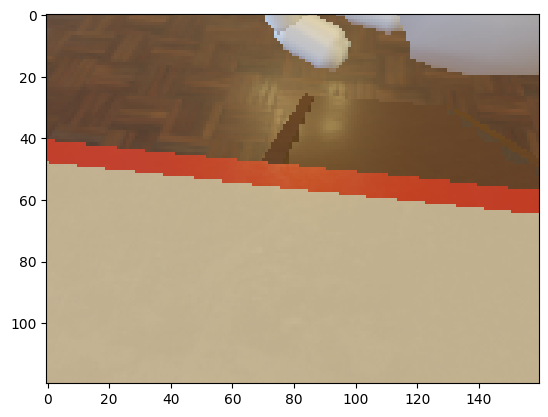

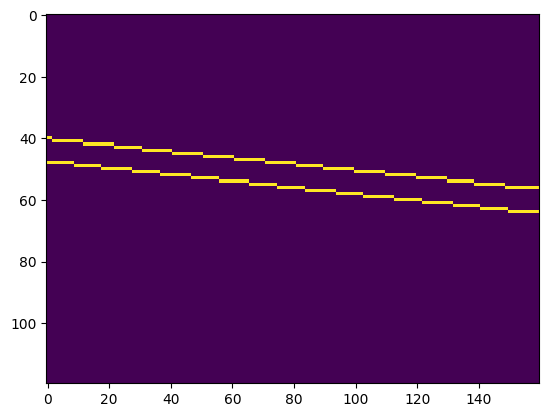

[[[  0  40 157  56]]

 [[  3  48 149  63]]]
17.0.png


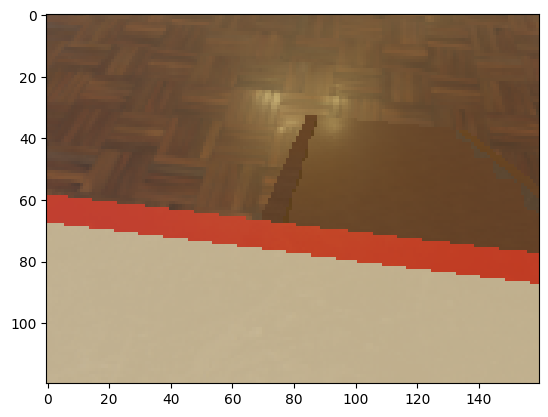

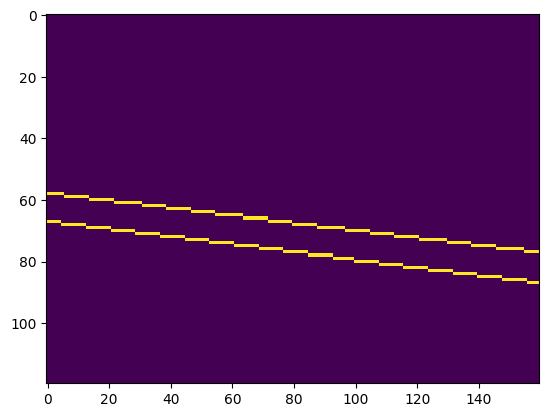

[[[ 93  69 159  77]]

 [[  0  67 159  87]]

 [[  0  58 100  70]]]
Yes
18.0.png


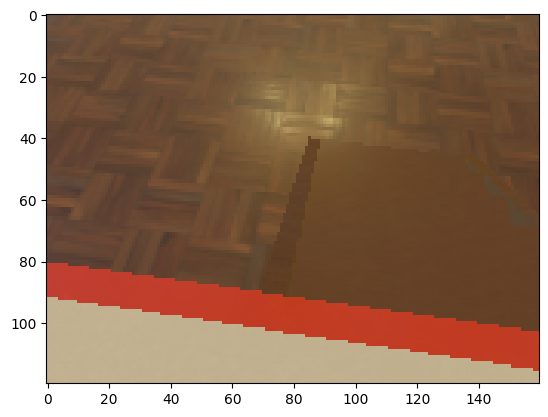

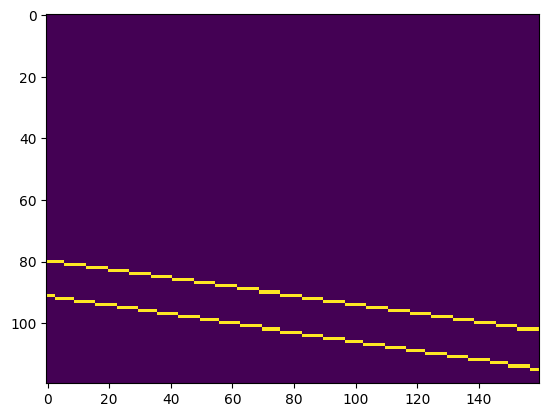

[[[  1  80 131  98]]

 [[ 50  99 159 115]]]
Yes
19.0.png


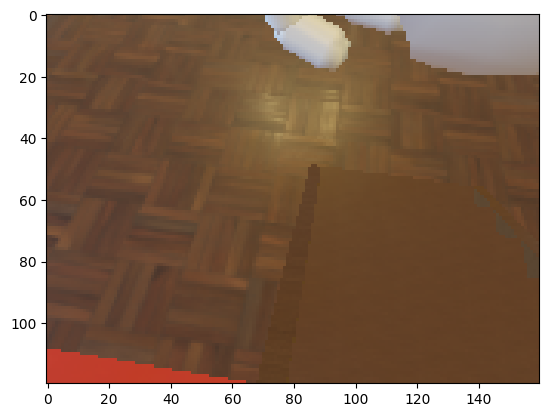

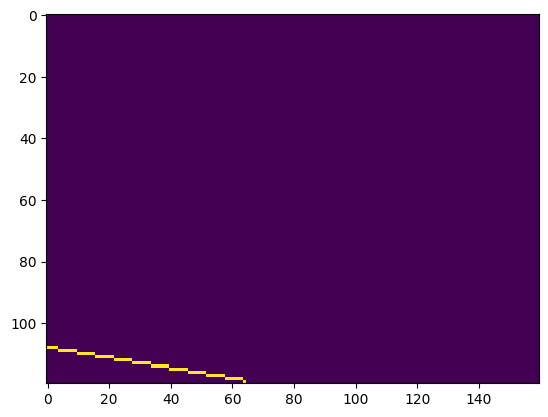

[[[  4 109  64 119]]]
Yes
20.0.png


TypeError: Image data of dtype object cannot be converted to float

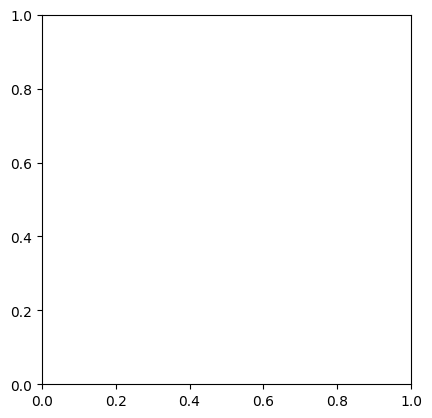

In [2]:
import cv2
import numpy as np
import math
import matplotlib. pyplot as plt
import PIL.Image
# This code uses the line_detection function in order to detect the line for test ( remmember to run the line first)
# starting picture number
j = 15
# range indicates how many pictures would be in our run
for i in range(5):
    # reading image
    #img5 = cv2.imread("camera.jpg")
    j= j+1
    file_name = str(j)+'.0.png'
    print(file_name)
    img = cv2.imread(file_name)
    if line_detection(img):
        print('Yes')





In [6]:
# Class to be implemented in Webots
# Here All printing and redundent stuffes would be eliminated the only parametr out of function would be bolean and sensitivity factor

# main fucntion to detect line:


def line_detection(image, ya_max = 80, yb_max = 80):
    import cv2
    import numpy as np
    import math
    import matplotlib. pyplot as plt
    import PIL.Image


    # changing to hsv for better processing for the colors
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    #plot_in_range(hsv)


    # masking lower and upper bounds BGR
    # These are for RGB
    lower = (103, 127, 157)
    upper = (179, 234, 255)

    # changing threshold to BGR
    #lower = (80, 50, 0)
    #upper = (255, 255, 16)

    mask = cv2.inRange(hsv, lower, upper)
 
 

    # edge detection ( this is essential since the hough transform only able to identify gray scale image)
    edge = cv2.Canny(mask, 50, 200, None, 3)


    #line = np.asarray(edge)

    lines = cv2.HoughLinesP(edge, 1, np.pi/180, 50, minLineLength=10, maxLineGap=4) 


    # Just y position indicator can show us the correct position
    ya_pixel = 0
    yb_pixel = 0 

    if lines is not None:
        number_of_lines = len(lines)
        for i in range(0, len(lines)):
            for j in range(0, len(lines[i])):
                ya_pixel = ya_pixel + lines[i][j][1]
                yb_pixel = ya_pixel + lines[i][j][3]
        if ya_pixel/number_of_lines > ya_max or yb_pixel/number_of_lines > yb_max:
            return True
        else:
            return False


def test_function_for_saved_images():
    j = 10
    for i in range(10):
        # reading image
        #img5 = cv2.imread("camera.jpg")
        j= j+1
        file_name = str(j)+'.0.png'
        print(file_name)
        img = cv2.imread(file_name)
        if line_detection(img):
            print('Yes')














11.0.png
12.0.png
13.0.png
14.0.png
15.0.png
16.0.png
17.0.png
Yes
18.0.png
Yes
19.0.png
Yes
20.0.png


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
